methods: central difference, upwind, lax-friedrichs, leapfrog, lax-wendroff

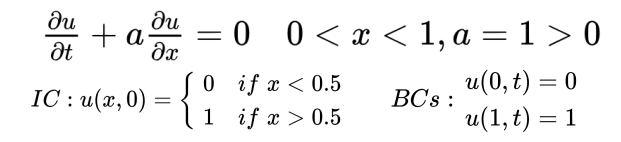

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Nx = 9
hx = 1.0 / (Nx+1)
a = 1.0
ht = 0.5 * hx / abs(a)
sigma = a * ht / hx

Tf = 0.2
N = int(Tf / ht)

In [ ]:
x = np.linspace(0,1,Nx+2)
u_old = np.zeros(Nx+2)
u_new = np.zeros(Nx+2)
u_exact = np.zeros(Nx+2)

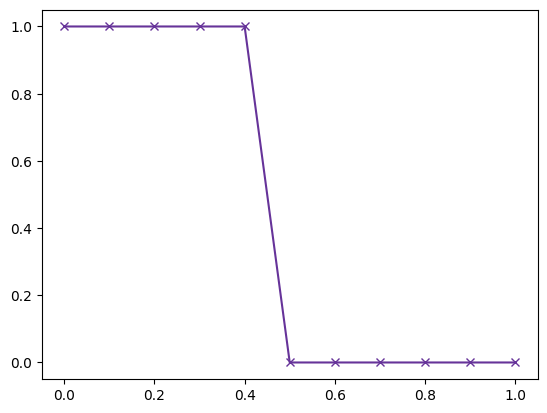

In [ ]:
#initial condition
for i in range(Nx+2):
  if (x[i]<0.5):
    u_old[i] = 1.0
  else:
    u_old[i] = 0.0

    if (x[i]<0.7):
      u_exact[i] = 1.0
    else:
      u_exact[i] = 0.0


plt.plot(x,u_old, '-x', color='rebeccapurple')
u0 = u_old.copy()

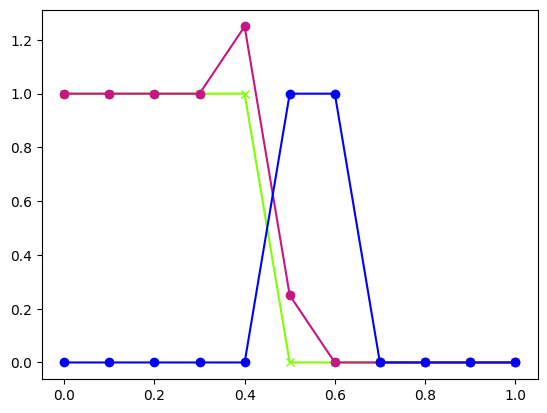

In [ ]:
for n in range(1+0*N):
  #bc
  u_new[0] = 1.0
  u_new[-1] = 0.0

  #loop
  for i in range(1,Nx+1):
    u_new[i] = u_old[i] - (sigma / 2.0) * (u_old[i+1] - u_old[i-1]) #diferença central de segunda ordem
  u_old = u_new.copy()

plt.plot(x,u0,'-x', color='chartreuse')
plt.plot(x,u_new, '-o', color='mediumvioletred')
plt.plot(x,u_exact, '-o', color='blue')

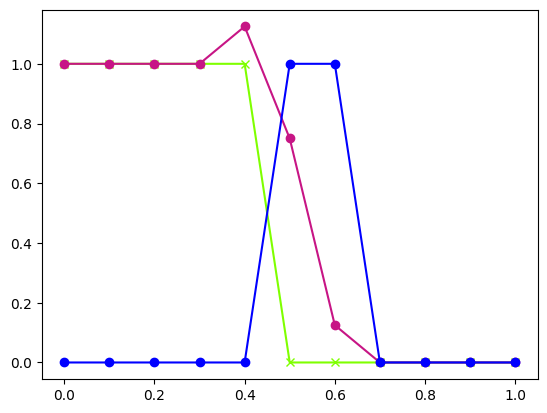

In [ ]:
for n in range(1+0*N):
  #bc
  u_new[0] = 1.0
  u_new[-1] = 0.0

  #loop
  for i in range(1,Nx+1):
    u_new[i] = (1-sigma)*u_old[i] + sigma*u_old[i-1] #upwind a = 1
  u_old = u_new.copy()

plt.plot(x,u0,'-x', color='chartreuse')
plt.plot(x,u_new, '-o', color='mediumvioletred')
plt.plot(x,u_exact, '-o', color='blue')

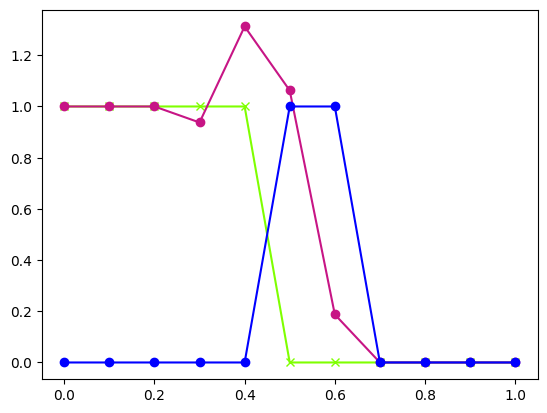

In [ ]:
for n in range(1+0*N):
  #bc
  u_new[0] = 1.0
  u_new[-1] = 0.0

  #loop
  for i in range(1,Nx+1):
    u_new[i] = (1+sigma)*u_old[i] - sigma*u_old[i+1] #upwind invertido (a = -1)
  u_old = u_new.copy()

plt.plot(x,u0,'-x', color='chartreuse')
plt.plot(x,u_new, '-o', color='mediumvioletred')
plt.plot(x,u_exact, '-o', color='blue')

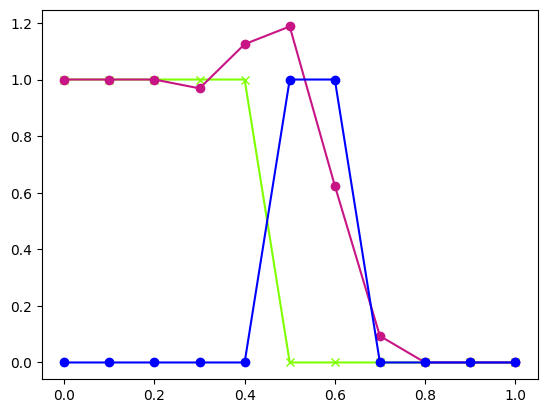

In [ ]:
for n in range(1+0*N):
  #bc
  u_new[0] = 1.0
  u_new[-1] = 0.0

  #loop
  for i in range(1,Nx+1):
    #upwind final (generalizado)
    ap = max(a,0)
    am = min(a,0)
    uxm = (u_old[i]-u_old[i-1])/hx
    uxp = (u_old[i+1]-u_old[i])/hx
    u_new[i] = u_old[i] - ht * (ap*uxm + am*uxp)

plt.plot(x,u0,'-x', color='chartreuse')
plt.plot(x,u_new, '-o', color='mediumvioletred')
plt.plot(x,u_exact, '-o', color='blue')

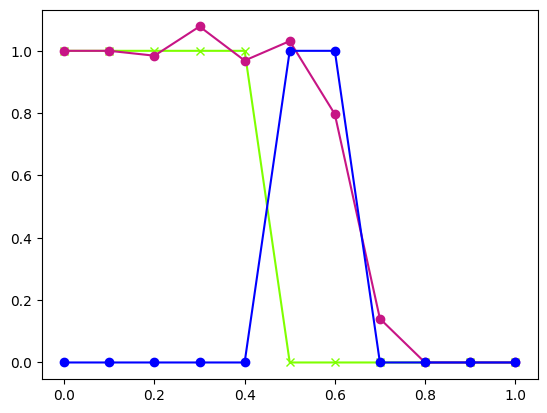

In [ ]:
for n in range(1+0*N):
  #bc
  u_new[0] = 1.0
  u_new[-1] = 0.0

  #loop
  for i in range(1,Nx+1):
    #lax-friedrich
    u_new[i] = (u_old[i-1] + u_old[i+1])/2.0 - sigma/2.0*(u_old[i+1] - u_old[i-1])

plt.plot(x,u0,'-x', color='chartreuse')
plt.plot(x,u_new, '-o', color='mediumvioletred')
plt.plot(x,u_exact, '-o', color='blue')

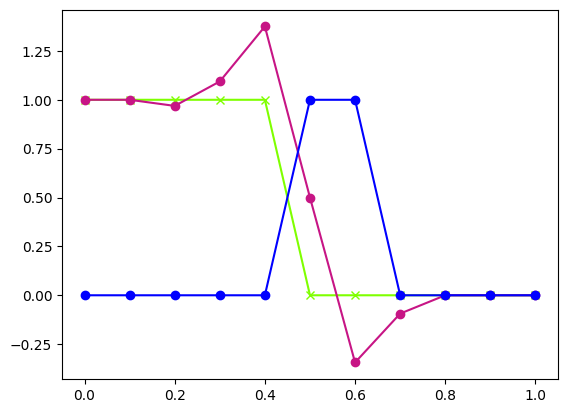

In [ ]:
for n in range(1+0*N):
  #bc
  u_new[0] = 1.0
  u_new[-1] = 0.0

  #loop
  for i in range(1,Nx+1):
    #leapfrog
    u_new[i] = ht*a*(u_old[i+1]-u_old[i-1])/hx + u_old[i]

plt.plot(x,u0,'-x', color='chartreuse')
plt.plot(x,u_new, '-o', color='mediumvioletred')
plt.plot(x,u_exact, '-o', color='blue')

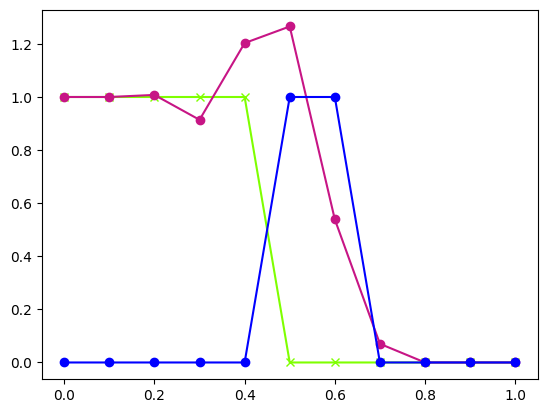

In [ ]:
for n in range(1+0*N):
  #bc
  u_new[0] = 1.0
  u_new[-1] = 0.0

  #loop
  for i in range(1,Nx+1):
    #lax-wendroff
    u_new[i] = u_old[i] - ((sigma / 2.0) * (u_old[i+1] - u_old[i-1])) + (sigma * sigma * (u_old[i+1] - 2.0 * u_old[i] + u_old[i-1]))/2

plt.plot(x,u0,'-x', color='chartreuse')
plt.plot(x,u_new, '-o', color='mediumvioletred')
plt.plot(x,u_exact, '-o', color='blue')

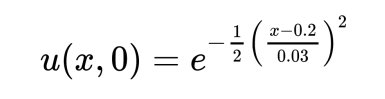

(que há maior dispersão)

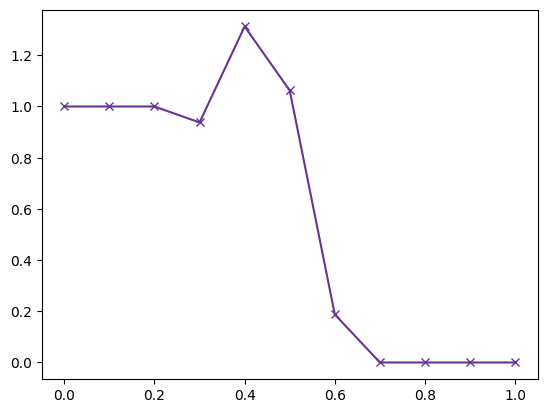

In [ ]:
#initial condition
u_old[i] = np.exp(-0.5*((x[i]-0.2)/0.03)**2.0)
u_exact[i] = np.exp(-0.5*((x[i]-Tf*a-0.2)/0.03)**2)
plt.plot(x,u_old, '-x', color='rebeccapurple')
u0 = u_old.copy()

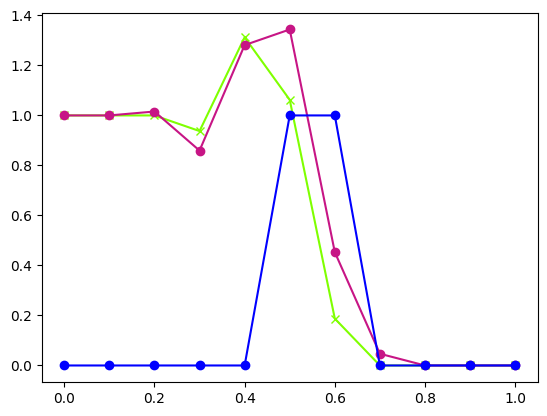

In [ ]:
for n in range(1+0*N):
  #bc
  u_new[0] = 1.0
  u_new[-1] = 0.0

  #loop
  for i in range(1,Nx+1):
    u_new[i] = u_old[i] - (sigma / 2.0) * (u_old[i+1] - u_old[i-1]) #diferença central de segunda ordem
  u_old = u_new.copy()

plt.plot(x,u0,'-x', color='chartreuse')
plt.plot(x,u_new, '-o', color='mediumvioletred')
plt.plot(x,u_exact, '-o', color='blue')

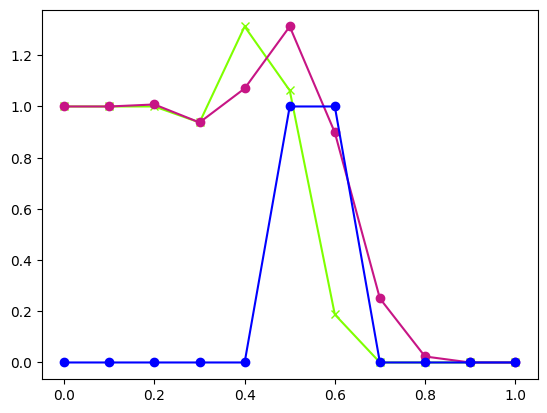

In [ ]:
for n in range(1+0*N):
  #bc
  u_new[0] = 1.0
  u_new[-1] = 0.0

  #loop
  for i in range(1,Nx+1):
    u_new[i] = (1-sigma)*u_old[i] + sigma*u_old[i-1] #upwind a = 1
  u_old = u_new.copy()

plt.plot(x,u0,'-x', color='chartreuse')
plt.plot(x,u_new, '-o', color='mediumvioletred')
plt.plot(x,u_exact, '-o', color='blue')

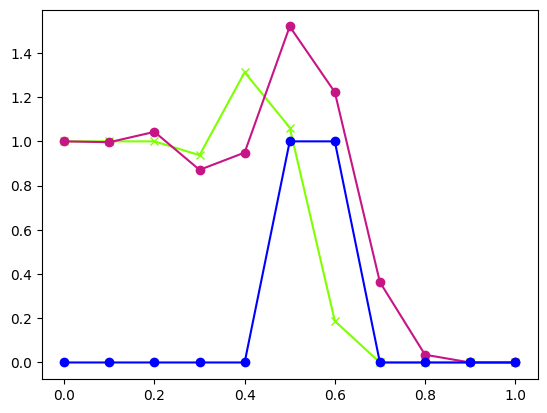

In [ ]:
for n in range(1+0*N):
  #bc
  u_new[0] = 1.0
  u_new[-1] = 0.0

  #loop
  for i in range(1,Nx+1):
    u_new[i] = (1+sigma)*u_old[i] - sigma*u_old[i+1] #upwind invertido (a = -1)
  u_old = u_new.copy()

plt.plot(x,u0,'-x', color='chartreuse')
plt.plot(x,u_new, '-o', color='mediumvioletred')
plt.plot(x,u_exact, '-o', color='blue')

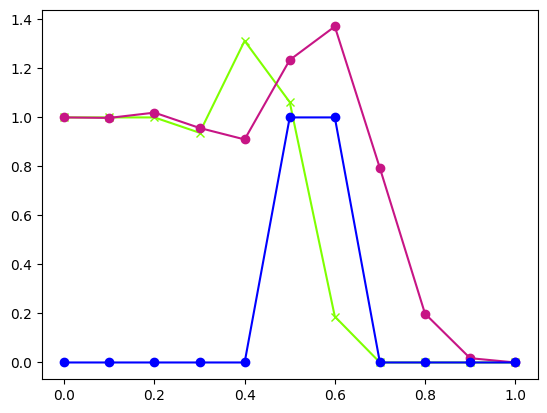

In [ ]:
for n in range(1+0*N):
  #bc
  u_new[0] = 1.0
  u_new[-1] = 0.0

  #loop
  for i in range(1,Nx+1):
    #upwind final (generalizado)
    ap = max(a,0)
    am = min(a,0)
    uxm = (u_old[i]-u_old[i-1])/hx
    uxp = (u_old[i+1]-u_old[i])/hx
    u_new[i] = u_old[i] - ht * (ap*uxm + am*uxp)

plt.plot(x,u0,'-x', color='chartreuse')
plt.plot(x,u_new, '-o', color='mediumvioletred')
plt.plot(x,u_exact, '-o', color='blue')

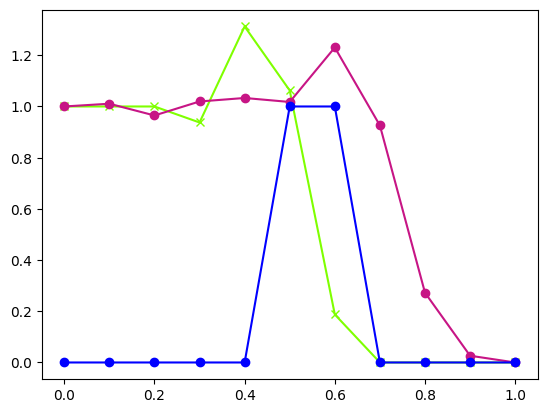

In [ ]:
for n in range(1+0*N):
  #bc
  u_new[0] = 1.0
  u_new[-1] = 0.0

  #loop
  for i in range(1,Nx+1):
    #lax-friedrich
    u_new[i] = (u_old[i-1] + u_old[i+1])/2.0 - sigma/2.0*(u_old[i+1] - u_old[i-1])

plt.plot(x,u0,'-x', color='chartreuse')
plt.plot(x,u_new, '-o', color='mediumvioletred')
plt.plot(x,u_exact, '-o', color='blue')

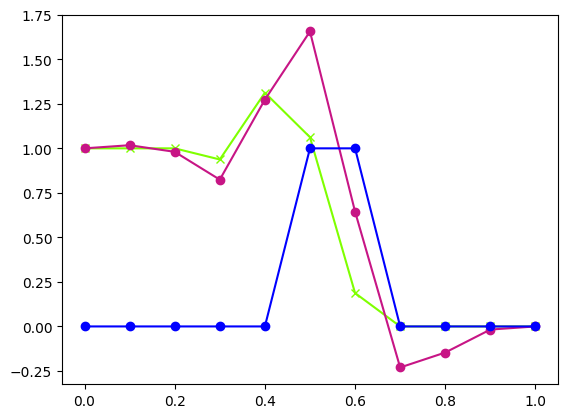

In [ ]:
for n in range(1+0*N):
  #bc
  u_new[0] = 1.0
  u_new[-1] = 0.0

  #loop
  for i in range(1,Nx+1):
    #leapfrog
    u_new[i] = ht*a*(u_old[i+1]-u_old[i-1])/hx + u_old[i]

plt.plot(x,u0,'-x', color='chartreuse')
plt.plot(x,u_new, '-o', color='mediumvioletred')
plt.plot(x,u_exact, '-o', color='blue')

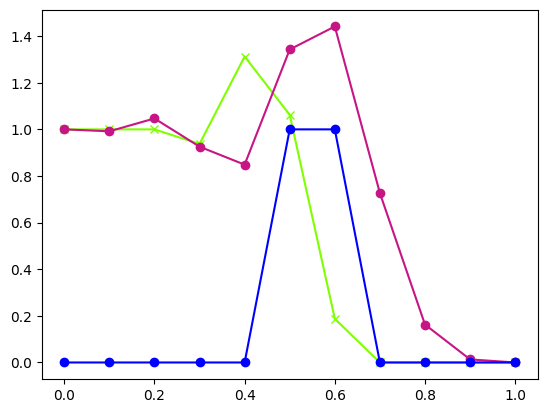

In [ ]:
for n in range(1+0*N):
  #bc
  u_new[0] = 1.0
  u_new[-1] = 0.0

  #loop
  for i in range(1,Nx+1):
    #lax-wendroff
    u_new[i] = u_old[i] - ((sigma / 2.0) * (u_old[i+1] - u_old[i-1])) + (sigma * sigma * (u_old[i+1] - 2.0 * u_old[i] + u_old[i-1]))/2

plt.plot(x,u0,'-x', color='chartreuse')
plt.plot(x,u_new, '-o', color='mediumvioletred')
plt.plot(x,u_exact, '-o', color='blue')